# New book chapter 6 and 8 solutions

## Chapter 6 Computational exercises

6.1: 2. Rewrite  procedure  Spline/  so that a binary search  is used  to  find  the  desired  interval.  Test  the  revised  code. What are  the  advantages  and  disadvantages  of a binary  search compared  to  the  procedure  in  the  text? 

In [1]:
def spline1(t, y, x):
    n = len(t)
    
    i, j = 0, n - 2  
    while i <= j:
        k = (i + j) // 2
        if t[k] <= x < t[k + 1]:
            break
        elif x < t[k]:
            j = k - 1
        else:
            i = k + 1
    else:
        k = n - 2 if x == t[-1] else 0

    t0, t1 = t[k], t[k + 1]
    y0, y1 = y[k], y[k + 1]
    return y0 + (y1 - y0) * (x - t0) / (t1 - t0)

Test case:

In [2]:
t = [0.0, 1.0, 2.0, 3.0]
y = [0.0, 2.0, 0.0, 2.0]
x = 1.5
print(spline1(t, y, x)) 

1.0


Advantage: Reduces interval search from O(n) to O(log n)

Disadvantage: More Complex and harder to debug

6.1: 4. Write an adaptive spline interpolation procedure. The input should be:

- A function $f$
- An interval $[a, b]$
- A tolerance $\varepsilon$

The output should be:

- A set of knots $a = t_0 < t_1 < \cdots < t_n = b$
- A corresponding set of function values $y_i = f(t_i)$

Such that the first-degree spline interpolating function $S$ satisfies:

$|S(x) - f(x)| \leq \varepsilon$

for all points:

$x_{ij} = t_i + \dfrac{j}{10}(t_{i+1} - t_i)$

where $0 \leq i \leq n - 1$ and $0 \leq j \leq 9$.


In [3]:
def adaptive_spline(f, a, b, epsilon):
    knots = [a]
    values = [f(a)]

    def process_interval(t0, t1, f0, f1):
        def S(x):
            return f0 + (f1 - f0) * (x - t0) / (t1 - t0)
        
        # Test at 10 interior points
        max_error = 0
        for j in range(1, 10):
            xj = t0 + j * (t1 - t0) / 10
            error = abs(S(xj) - f(xj))
            if error > max_error:
                max_error = error
        
        if max_error <= epsilon:
            knots.append(t1)
            values.append(f1)
        else:
            tm = (t0 + t1) / 2
            fm = f(tm)
            process_interval(t0, tm, f0, fm)
            process_interval(tm, t1, fm, f1)

    f_b = f(b)
    process_interval(a, b, f(a), f_b)
    return knots, values

Test case:

In [4]:
import math
import matplotlib.pyplot as plt

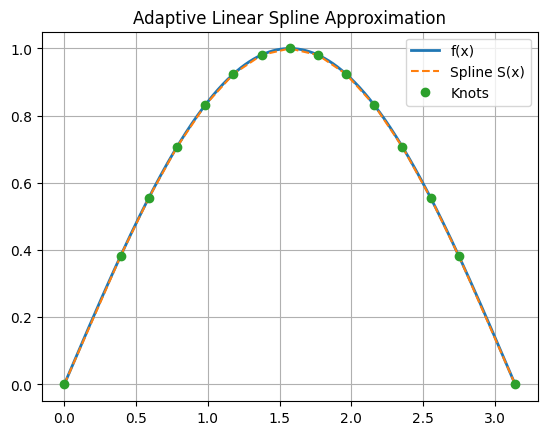

In [5]:
f = lambda x: math.sin(x)

a, b = 0, math.pi
epsilon = 0.01

t, y = adaptive_spline(f, a, b, epsilon)

x_plot = [a + i * (b - a) / 1000 for i in range(1001)]
y_true = [f(xi) for xi in x_plot]

def linear_spline_eval(t, y, x):
    for i in range(len(t) - 1):
        if t[i] <= x <= t[i + 1]:
            return y[i] + (y[i+1] - y[i]) * (x - t[i]) / (t[i+1] - t[i])
    return y[-1]  

y_spline = [linear_spline_eval(t, y, xi) for xi in x_plot]

plt.plot(x_plot, y_true, label='f(x)', linewidth=2)
plt.plot(x_plot, y_spline, label='Spline S(x)', linestyle='--')
plt.plot(t, y, 'o', label='Knots')
plt.legend()
plt.title('Adaptive Linear Spline Approximation')
plt.grid(True)
plt.show()


6.2: 3.  Using  at  most  20  knots  and  the  cubic  spline  routines  
Spline3_Coef  and  Spline3_Eval,  plot on  a computer  plot- 
ter  an  outline  of your: 
b.  Signature.  

In [6]:
import numpy as np

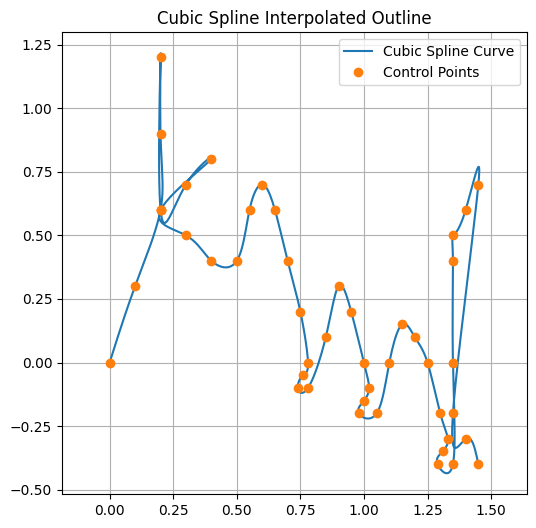

In [16]:
def spline3_coef(x, y):
    n = len(x) - 1
    h = np.diff(x)
    alpha = np.zeros(n)
    
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1])
    
    l = np.ones(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    c = np.zeros(n+1)
    
    for i in range(1, n):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]
    
    b = np.zeros(n)
    d = np.zeros(n)
    a = y[:-1]
    
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (y[j+1] - y[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j]) / (3*h[j])
    
    return a, b, c[:-1], d

def spline3_eval(x, coefs, xx):
    a, b, c, d = coefs
    n = len(a)
    sx = []

    for x_val in xx:
        i = np.searchsorted(x, x_val) - 1
        i = max(0, min(i, n-1))
        dx = x_val - x[i]
        s_val = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
        sx.append(s_val)
    
    return np.array(sx)

x_points = [
    0.0, 0.1, 0.2, 0.2, 0.2, 
    0.2, 0.3, 0.4, 0.2, 0.3, 0.4,     # K
    0.5, 0.55, 0.6, 0.65, 0.7, 0.75,
    0.78, 0.76, 0.74,                 # a
    0.78, 0.85, 0.9, 0.95, 1.0,
    1.02, 1.0, 0.98,                  # n
    1.05, 1.1, 1.15, 1.2, 1.25, 1.3,
    1.33, 1.31, 1.29,                 # a
    1.35, 1.35, 1.35,                 # k stem
    1.35, 1.4, 1.45,                  # k upper
    1.35, 1.4, 1.45                   # k lower
]

y_points = [
    0.0, 0.3, 0.6, 0.9, 1.2,
    0.6, 0.7, 0.8, 0.6, 0.5, 0.4,     # K
    0.4, 0.6, 0.7, 0.6, 0.4, 0.2,
    0.0, -0.05, -0.1,                 # a
    -0.1, 0.1, 0.3, 0.2, 0.0,
    -0.1, -0.15, -0.2,                # n
    -0.2, 0.0, 0.15, 0.1, 0.0, -0.2,
    -0.3, -0.35, -0.4,                # a
    -0.4, 0.0, 0.4,                   # k stem
    0.5, 0.6, 0.7,                    # k upper
    -0.2, -0.3, -0.4                  # k lower
]


t = np.arange(len(x_points))

coef_x = spline3_coef(t, x_points)
coef_y = spline3_coef(t, y_points)

tt = np.linspace(0, len(t) - 1, 500)

xx = spline3_eval(t, coef_x, tt)
yy = spline3_eval(t, coef_y, tt)

plt.figure(figsize=(6, 6))
plt.plot(xx, yy, label='Cubic Spline Curve')
plt.plot(x_points, y_points, 'o', label='Control Points')
plt.title('Cubic Spline Interpolated Outline')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


6.2: 6. Draw a spiral  (or other  curve  that  is not  a  function)  and reproduce  it by way  of parametric  spline  functions. 

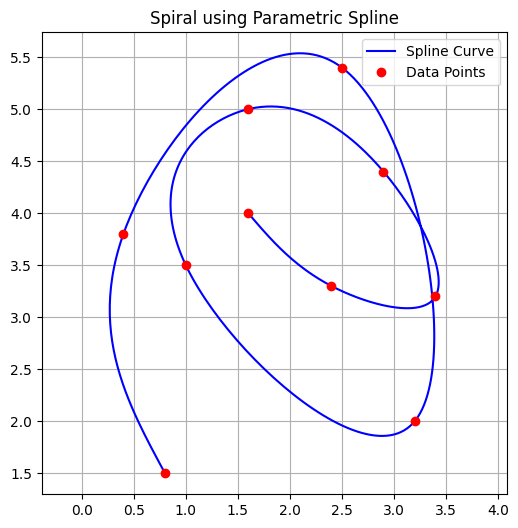

In [19]:
x_coords = [1.6, 2.4, 3.4, 2.9, 1.6, 1.0, 3.2, 2.5, 0.4, 0.8]
y_coords = [4.0, 3.3, 3.2, 4.4, 5.0, 3.5, 2.0, 5.4, 3.8, 1.5]

t = np.linspace(0, 1, len(x_coords))

x_coefs = spline3_coef(t, x_coords)
y_coefs = spline3_coef(t, y_coords)

tt = np.linspace(0, 1, 500)
x_spline = spline3_eval(t, x_coefs, tt)
y_spline = spline3_eval(t, y_coefs, tt)

plt.figure(figsize=(6, 6))
plt.plot(x_spline, y_spline, label='Spline Curve', color='blue')
plt.plot(x_coords, y_coords, 'ro', label='Data Points')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title('Spiral using Parametric Spline')
plt.show()


## Chapter 8 Computational exercises


8.1: 4. Write  and  test  a  procedure  for  determining  &A^{-1}$  for a given  square  matrix  A of order  n.  Your  procedure  should use  procedures  Gauss  and  Solve. 

In [20]:
def gauss_elimination(A, b):
    n = len(b)
    for k in range(n):
        for i in range(k+1, n):
            if A[k][k] == 0:
                raise ValueError("Zero pivot encountered.")
            factor = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] -= factor * A[k][j]
            b[i] -= factor * b[k]
    return A, b

def back_substitution(U, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - sum(U[i][j]*x[j] for j in range(i+1, n))) / U[i][i]
    return x

def inverse_matrix(A):
    n = A.shape[0]
    inv = np.zeros_like(A)
    I = np.eye(n)

    for i in range(n):
        A_copy = A.copy()
        b = I[:, i].copy()
        U, b_mod = gauss_elimination(A_copy, b)
        x = back_substitution(U, b_mod)
        inv[:, i] = x

    return inv

Test case:

In [22]:
A = np.array([
    [2, 1, 1],
    [1, 3, 2],
    [1, 0, 0]
], dtype=float)

A_inv = inverse_matrix(A)
print("Inverse of A:\n", A_inv)

# Check: A @ A_inv ≈ Identity
print("\nCheck A * A⁻¹:\n", np.round(A @ A_inv, 3))

Inverse of A:
 [[ 0.  0.  1.]
 [-2.  1.  3.]
 [ 3. -1. -5.]]

Check A * A⁻¹:
 [[ 1.  0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]


8.1: 8. Investigate the numerical difficulties in inverting the following matrix:

$$
A = \begin{bmatrix}
-0.0001 & 5.096 & 5.101 & 1.853 \\
0       & 3.737 & 3.740 & 3.392 \\
0       & 0     & 0.006 & 5.254 \\
0       & 0     & 0     & 4.567
\end{bmatrix}
$$


In [24]:
A = np.array([
    [-0.0001, 5.096, 5.101, 1.853],
    [0, 3.737, 3.740, 3.392],
    [0, 0, 0.006, 5.254],
    [0, 0, 0, 4.567]
], dtype=float)

cond_A = np.linalg.cond(A)
print("Condition number of A:", cond_A)

try:
    A_inv = inverse_matrix(A)
    print("\nInverse of A:\n", A_inv)

    # Check how close A * A_inv is to identity
    I_approx = A @ A_inv
    print("\nA * A⁻¹:\n", I_approx)

except np.linalg.LinAlgError as e:
    print("Numerical error during inversion:", e)


Condition number of A: 190660.5582415591

Inverse of A:
 [[-1.00000000e+04  1.36366069e+04  1.51502988e+03 -7.81373716e+03]
 [ 0.00000000e+00  2.67594327e-01 -1.66800464e+02  1.91693006e+02]
 [ 0.00000000e+00  0.00000000e+00  1.66666667e+02 -1.91737829e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.18962120e-01]]

A * A⁻¹:
 [[ 1.00000000e+00 -5.04582550e-17 -1.39834810e-14 -1.56190935e-14]
 [ 0.00000000e+00  1.00000000e+00 -3.78008735e-14  7.61926985e-14]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  8.68925276e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


This matrix is difficult to invert numerically because:

Small pivots (near-zero diagonals) make the inverse large

Floating-point errors are amplified

The condition number is large.

Matrix is hence ill-conditioned